<a href="https://colab.research.google.com/github/farzad-salimijazi/Farzad/blob/master/CSCI566_Intro_PyTorch_(coding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI566 Lecture 14. PyTorch and Deep Reinforcement Learning Implementation


This notebook is for introducing basic usage of PyTorch and an example implementation of deep reinforcement learning algorithm (simple q-learning).


It covers introduction to

*   PyTorch
*   OpenAI gym
*   Q-learning implementation



## PyTorch

You can find a tutorial at https://bit.ly/60minblitz .  

In [0]:
# PyTorch 
import torch
import numpy as np

### Tensors

PyTorch's tensors are similar to numpy's ndarrays. 

In [2]:
# Zero tensor
z = torch.zeros(2,3)

print('zeros: ', z)
print('dtype: ', z.dtype)
print('shape: ', z.shape)

zeros:  tensor([[0., 0., 0.],
        [0., 0., 0.]])
dtype:  torch.float32
shape:  torch.Size([2, 3])


In [3]:
# One tensor
o = torch.ones(2,3)

print('ones: ', o)

ones:  tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
# Random tensor
r = torch.randn(2,3)

print('random: ', r)

random:  tensor([[ 0.8456,  0.9450, -0.7572],
        [-1.1304,  0.9331, -0.5778]])


In [5]:
# Identity tensor
i = torch.eye(3)

print('identity: ', i)

identity:  tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [6]:
# Tensor from values, numpy array, list
a_scalar = 10.10
a = torch.tensor(a_scalar)

print(a)

b_array = np.array([[1, 2, 3], [4, 5, 6]])
b = torch.tensor(b_array)

print(b) 

x_list = [5., 6., 6.]
x = torch.tensor(x_list)

print(x)

tensor(10.1000)
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([5., 6., 6.])


In [7]:
# Tensor with autograd
v = torch.tensor(x_list, requires_grad=True)

print(v)

tensor([5., 6., 6.], requires_grad=True)


In [10]:
# Tensor to scalar
print(a.item())


# Tensor to numpy array
print(x.numpy())


#print(v.numpy()) # will generate an error

# Tensor with gradient needs to be detached before numpy()
print(v.detach().numpy())

10.100000381469727
[5. 6. 6.]
[5. 6. 6.]


### Operations

In [11]:
# Add
print(o + r)

# Element-wise multiplication
print(r * o)

# Matrix multiplication
print(torch.matmul(r, i))

# Reshape
print(o.view(3, 2, 1)) # only change view if possible , you do not manipulate it but indexes are in a new view
print(o.reshape(3, 2)) # always rearrange values in memory

tensor([[ 1.8456,  1.9450,  0.2428],
        [-0.1304,  1.9331,  0.4222]])
tensor([[ 0.8456,  0.9450, -0.7572],
        [-1.1304,  0.9331, -0.5778]])
tensor([[ 0.8456,  0.9450, -0.7572],
        [-1.1304,  0.9331, -0.5778]])
tensor([[[1.],
         [1.]],

        [[1.],
         [1.]],

        [[1.],
         [1.]]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


### Gradient
The code below shows a simple example of autograd.

In [16]:
# y = (x - 1)^2 + 2

x = torch.randn(1, requires_grad=True)
y = (x - 1).pow(2) + 2

print(x)
print(y)

tensor([1.1220], requires_grad=True)
tensor([2.0149], grad_fn=<AddBackward0>)


In [17]:
# Find the minimum of y
for _ in range(1000):
  y = (x - 1).pow(2) + 2
  y.backward()
  
  x.data = x.data - 0.01*x.grad.data
  print(y.item(), x.grad.data.item())
  x.grad.data.zero_()

print('y is minimum at x = 1')
print('x = ', x.item())
print('y = ', y.item())

2.0148744583129883 0.24392175674438477
2.0142853260040283 0.2390432357788086
2.0137197971343994 0.23426246643066406
2.013176441192627 0.22957730293273926
2.0126545429229736 0.22498583793640137
2.0121536254882812 0.22048616409301758
2.011672258377075 0.21607637405395508
2.0112099647521973 0.21175479888916016
2.01076602935791 0.2075197696685791
2.0103397369384766 0.2033693790435791
2.009930372238159 0.19930195808410645
2.0095369815826416 0.19531583786010742
2.0091593265533447 0.19140958786010742
2.0087966918945312 0.18758130073547363
2.008448362350464 0.18382978439331055
2.0081138610839844 0.18015313148498535
2.0077924728393555 0.17655014991760254
2.007483959197998 0.1730191707611084
2.007187604904175 0.16955876350402832
2.0069029331207275 0.1661674976348877
2.006629467010498 0.16284418106079102
2.0063669681549072 0.15958738327026367
2.006114959716797 0.15639567375183105
2.0058727264404297 0.15326786041259766
2.0056402683258057 0.15020251274108887
2.0054168701171875 0.14719843864440918
2

### Modules (layers)

`Module` is a basic component of a computation graph in PyTorch, including all kinds of layers (https://pytorch.org/docs/stable/nn.html). 


In [20]:
# Layers
import torch.nn as nn
import torch.nn.functional as F

input_dim = 20
output_dim = 30

torch.manual_seed(123)
input = torch.randn(10, input_dim)

# Linear transform (fully connected layer)
linear_module = nn.Linear(input_dim, output_dim, bias=True)
output = linear_module(input)

print('After linear', output.shape)

# ReLU
relu_module = nn.ReLU()
relu_output = relu_module(output)

print('Before ReLU:', output[0, :5])
print('Chaining modules:', relu_output[0, :5])

After linear torch.Size([10, 30])
Before ReLU: tensor([ 0.3038,  0.5615, -0.4189, -0.0026,  0.0013], grad_fn=<SliceBackward>)
Chaining modules: tensor([0.3038, 0.5615, 0.0000, 0.0000, 0.0013], grad_fn=<SliceBackward>)


### Sequential (sequence of modules)

`nn.Sequential(module1, module2, ...)` can chain a sequence of modules.

In [22]:
# Combine modules
sequential_module = nn.Sequential(linear_module, relu_module)

sequential_output = sequential_module(input)

print('Sequential:', sequential_output[0, :5])

Sequential: tensor([0.3038, 0.5615, 0.0000, 0.0000, 0.0013], grad_fn=<SliceBackward>)


### Models

To build complex modules and reuse them, you can define your own Module class, like `Model1`, `Model2`, and `Model3`.
Modules (layers) defined in a module will be automatically added to the computation graph.

Your custom module should inherit from `nn.Module`. `super().__init__()` should be added in your `__init__()` method.
You also need to implement your own `forward()` function which describes the forward pass.

Define layers using member variables.

In [23]:
class Model1(nn.Module):
  def __init__(self):
    super().__init__() # must be added before define you module
    
    # Define layers as member variables
    self.linear_module = nn.Linear(input_dim, output_dim, bias=True)
    self.relu = nn.ReLU()
    
  def forward(self, input):
    # Define forward pass (input -> linear module -> relu -> output)
    output1 = self.linear_module(input)
    output2 = self.relu(output1)
    return output2

  
torch.manual_seed(123)

# Make a model
model1 = Model1()

# Run forward pass. model1(input) == model1.forward(input)
model1_output = model1(input)

print(model1)
print('Model 1 output:', model1_output[0, :5])

Model1(
  (linear_module): Linear(in_features=20, out_features=30, bias=True)
  (relu): ReLU()
)
Model 1 output: tensor([0.0000, 0.4561, 0.0000, 0.0000, 0.0000], grad_fn=<SliceBackward>)


Define layers using `nn.Sequential`.

In [24]:
class Model2(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Define layers as a sequential
    
    linear = nn.Linear(input_dim, output_dim,bias=True)
    relu = nn.ReLU()
#     fc = []
#     for i in range(10):
#       fc.append(nn.)

    self.seq = nn.Sequential(linear, relu)
      
      
    pass
    
  def forward(self, input):
    output = self.seq (input)
    return output
  
  
torch.manual_seed(123)
model2 = Model2()
model2_output = model2(input)

print(model2)
print('Model 2 output:', model2_output[0, :5])

Model2(
  (seq): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
  )
)
Model 2 output: tensor([0.0000, 0.4561, 0.0000, 0.0000, 0.0000], grad_fn=<SliceBackward>)


Define layers using `nn.ModuleList`.

In [26]:
class Model3(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Define layers as a module list
    linear = nn.Linear(input_dim, output_dim,bias=True)
    relu = nn.ReLU()
    
    self.module_list = nn.ModuleList([linear, relu])
    pass
    
  def forward(self, input):
    
    output1 = self.module_list[0](input)
    output2 = self.module_list[1](output1)
    return output2
  
  
torch.manual_seed(123)
model3 = Model3()
model3_output = model3(input)

print(model3)
print('Model 3 output:', model3_output[0, :5])

Model3(
  (module_list): ModuleList(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
  )
)
Model 3 output: tensor([0.0000, 0.4561, 0.0000, 0.0000, 0.0000], grad_fn=<SliceBackward>)


### Simple MLP module

In [28]:
class MLP(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dims=[]):
    super().__init__()
    
    # Define layers
    fc = []
    previous_dim = input_dim
    for dim in hidden_dims:
      fc.append(
          nn.Linear(previous_dim, dim) 
      )
      fc.append(
          nn.ReLU()
      )
      previous_dim = dim
    
    fc.append(
        nn.Linear(previous_dim, output_dim)
    )
    
    # Convert a list of layers to a sequential module
    self.fc = nn.Sequential(*fc)
  
  def forward(self, observation):
    return self.fc(observation)
  
  
mlp = MLP(100, 20, [30, 30,40,50])
print(mlp)

MLP(
  (fc): Sequential(
    (0): Linear(in_features=100, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=50, bias=True)
    (7): ReLU()
    (8): Linear(in_features=50, out_features=20, bias=True)
  )
)


### Be careful!

If layers are not referenced by member variables and not added to `Sequential`, `ModuleList`, and `ModuleDict`, your module cannot update those layers.

In [29]:
# Wrong MLP module
class MLP_wrong(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dims=[]):
    super().__init__()
    
    fc = []
    previous_dim = input_dim
    for dim in hidden_dims:
      fc.append(
          nn.Linear(previous_dim, dim)
      )
      fc.append(
          nn.ReLU()
      )
      previous_dim = dim
    
    fc.append(
        nn.Linear(previous_dim, output_dim)
    )
    
    self.fc = fc # MLP module does not know about these layers
    
  def forward(self, observation):
    output = observation
    for layer in self.fc:
      output = self.fc(output)
    return output

  
mlp_wrong = MLP_wrong(100, 20, [30, 30])
print(mlp_wrong)

MLP_wrong()


### Optimizer

In [30]:
# Optimizers
import torch.optim as optim

# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-3)

true_output = torch.rand(output_dim)
rnd_input = torch.rand(input_dim)

for _ in range(10):
  # Predicted output
  predicted_output = model2(rnd_input)
  
  # Compute loss
  loss = loss_fn(predicted_output, true_output)
  print(loss)

  # Update model
  optimizer.zero_grad() # Zero out previous gradients
  loss.backward()  # Compute new gradients
  optimizer.step()  # Update parameters

tensor(0.2142, grad_fn=<MseLossBackward>)
tensor(0.2103, grad_fn=<MseLossBackward>)
tensor(0.2066, grad_fn=<MseLossBackward>)
tensor(0.2031, grad_fn=<MseLossBackward>)
tensor(0.1997, grad_fn=<MseLossBackward>)
tensor(0.1964, grad_fn=<MseLossBackward>)
tensor(0.1932, grad_fn=<MseLossBackward>)
tensor(0.1901, grad_fn=<MseLossBackward>)
tensor(0.1872, grad_fn=<MseLossBackward>)
tensor(0.1844, grad_fn=<MseLossBackward>)


### GPU support

You need to define your tensors in GPU.

It can be done by 

`x = torch.tensor(data, device=torch.device("cuda"))` 

or 

`x = torch.tensor(data).to(torch.device("cuda"))`.

or 

`x = torch.tensor(data).cuda()`

In [0]:
device = torch.device("cpu") 
# For gpu
# device = torch.device("cuda")

## OpenAI gym

### Installation

You can simply install OpenAI gym by executing `pip install gym`.

Here, we are using a virtual display to render videos in a headless server. 

In [32]:
# Render OpenAI gym: code from https://colab.research.google.com/drive/1flu31ulJlgiRL1dnN2ir8wGh9p7Zij2t

!pip install gym > /dev/null 2>&1
!apt-get install python-opengl -y > /dev/null 2>&1
!apt install xvfb -y > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install pyglet==1.3.2 > /dev/null 2>&1


from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()


# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


In [0]:
import glob
import io
import base64
from collections import defaultdict

import gym
from gym.wrappers import Monitor

import numpy as np
np.set_printoptions(precision=2, suppress=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from IPython.display import HTML
from IPython import display as ipythondisplay


"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

### Make an environment!

Observation space: Box(4,)
Action space: Discrete(2)
Initial observation: [ 0.03  0.01 -0.01 -0.05]


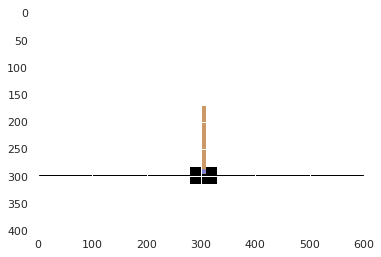

In [34]:
# Make an environment
env = gym.make('CartPole-v0')

# Observation space
print('Observation space:', env.observation_space)

# Action space
print('Action space:', env.action_space)

# Reset an episode and get an initial state
observation = env.reset()

print('Initial observation:', observation)

# Render an image
plt.imshow(env.render('rgb_array'))

### Take a step

Random action 0
Observation [ 0.03  0.01 -0.01 -0.05]
Next observation [ 0.03 -0.19 -0.01  0.24]
Reward 1.0
Done False
Info {}


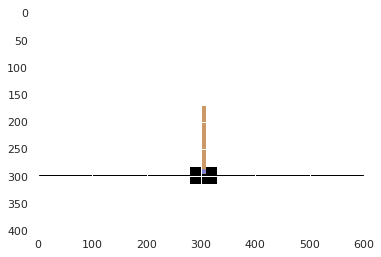

In [35]:
# Sample one random action
random_action = env.action_space.sample()
print('Random action', random_action)

# Take a step
observation_next, reward, done, info = env.step(random_action)

print('Observation', observation)
print('Next observation', observation_next)
print('Reward', reward)
print('Done', done)
print('Info', info)

# Render an image
plt.imshow(env.render('rgb_array'))

### Run one episode

In [36]:
# Make a new environment
env = gym.make('CartPole-v0')

# Wrap environment for recording
env = wrap_env(env)

# Initialize environment
observation = env.reset()

done = False
episode_reward = 0
episode_length = 0

# Run until done == True
while not done:
  # Take a step
  observation, reward, done, info = env.step(env.action_space.sample())
  
  episode_reward += reward
  episode_length += 1
  
print('Total reward:', episode_reward)
print('Total length:', episode_length)

env.close()
show_video()  

Total reward: 11.0
Total length: 11


## Q-learning

In [0]:
# Dataset for Q-learning
# Also called "experience replay buffer", "replay memory"
class Dataset(object):
  
  def __init__(self, size):
    self._size = size
    self._transitions = []
    self._index = 0
    
  # Store a transition (s_t, a_t, s_t+1, r_t, done)
  def store(self, obs, action, obs_next, reward, done):
    transition = {'obs': obs, 'action': action, 
                  'obs_next': obs_next, 'reward': reward, 'done': done}
    
    if self._index < self._size:
      self._transitions.append(transition)
    else:
      self._transitions[self._index] = transition
      
    self._index = (self._index + 1) % self._size

  # Sample `batch_size` transitions from the dataset and convert to tensors
  def sample(self, batch_size):
    indexes = np.random.randint(0, len(self._transitions), batch_size)
    batch = {
        k: np.stack([self._transitions[i][k] for i in indexes])
        for k in ['obs', 'action', 'obs_next', 'reward', 'done']}
    return batch

In [0]:
class Logger(object):
  
  def __init__(self):
    self._history = defaultdict(list)
    self._global_history = defaultdict(list)
  
  def add(self, info):
    for k, v in info.items():
      self._history[k].append(v)
      self._global_history[k].append(v)
      
  def summary(self):
    summary = []
    for k, v in self._history.items():
      summary.append('{}: {:.2f}'.format(k, np.mean(v)))
      
    print(', '.join(summary))
      
    self._history = defaultdict(list)
    
  def plot(self, key):
    n = len(self._global_history[key])
    plt.plot(np.arange(n), self._global_history[key])
    plt.title(key)    

In [0]:
# Q-network, an approximation of a Q-value function, Q(s, a)
class QNetwork(nn.Module):
  
  def __init__(self, observation_space, action_space):
    super().__init__()

    self._action_space = action_space
    self._eps = 1

    # Input: observation
    # Output: q-value for each action
    self.fc = MLP(observation_space.shape[0], action_space.n, [32, 32])
    print(self.fc)
    
  def forward(self, observation):
    q_values = self.fc(observation)
    return q_values
  
  def act(self, observation, is_train=True):
    # Epsilon greedy for exploration
    if is_train and np.random.uniform() < self._eps:
      action = self._action_space.sample()
    else:
      # Observation is numpy ndarray
      # Convert numpy array to tensor
      obs = torch.tensor([observation]).to(device, dtype=torch.float32)
      
      # Compute q-values
      q_values = self.forward(obs)
      q_values = q_values.detach().cpu().numpy().squeeze()
      
      # Take an action with maximum value
      action = np.argmax(q_values)
    
    return action
  
  def epsilon_decay(self):
    self._eps -= 0.01
    self._eps = max(self._eps, 0.01)
    
  def state_dict(self):
    state_dict = super().state_dict()
    state_dict['eps'] = self._eps
    return state_dict
  
  def load_state_dict(self, state_dict):
    self._eps = state_dict['eps']
    state_dict.pop('eps')
    super().load_state_dict(state_dict)

In [0]:
class Trainer(object):
  def __init__(self, env, model, dataset):
    self._env = env
    self._model = model
    self._dataset = dataset
    self._logger = Logger()
    
    self._optim = optim.Adam(model.parameters(), lr=0.001)
    
  def run_one_episode(self, env, is_train=True):
    model = self._model
    dataset = self._dataset
    
    done = False
    observation = env.reset()
    episode_length = 0
    episode_reward = 0
    
    while not done:
      
      # Sample an action
      action = model.act(observation, is_train)
      
      # Take a step
      observation_next, reward, done, info = env.step(action)
      
      # Add a transition to the dataset
      dataset.store(observation, action, observation_next, reward, done)
      observation = observation_next
      
      episode_length += 1
      episode_reward += reward
      
      # Train q-network
      if is_train:
        batch = dataset.sample(batch_size=20)
        loss = self._update(batch)
        model.epsilon_decay()
        
        self._logger.add({'loss': loss})
        self._logger.add({'action': action})
      
    if is_train:
      self._logger.add({'length': episode_length, 'reward': episode_reward})  
    else:
      print('reward: {}'.format(episode_reward))
          
  def _update(self, batch):
    batch_size = len(batch['obs'])
    
    obs = torch.tensor(batch['obs'], dtype=torch.float32)
    obs_next = torch.tensor(batch['obs_next'], dtype=torch.float32)
    rew = torch.tensor(batch['reward'], dtype=torch.float32).reshape(batch_size, 1)
    ac = torch.eye(self._env.action_space.n)[batch['action']]
    done = torch.tensor(batch['done'], dtype=torch.float32).reshape(batch_size, 1)
    
    discount_factor = 0.95
    
    # y
    with torch.no_grad():
      q_next = self._model(obs_next).max(dim=1, keepdim=True)[0]
      
      q_target = rew + (1 - done) * discount_factor * q_next
    
    # Q(s,a)
    q_predict = torch.sum(self._model(obs) * ac, dim=1, keepdim=True)    
    
    # Mean square error
    loss = (q_predict - q_target).pow(2).mean()
    
    # Backpropagation
    self._optim.zero_grad()
    loss.backward()
    self._optim.step()
    
    return loss.item()
    
  def train(self):
    num_episode = 200
    for i in range(num_episode):
      self.run_one_episode(env=self._env, is_train=True)
      
      if (i + 1) % 10 == 0:
        print('training episode {}/{}'.format(i + 1, num_episode))
        self._logger.summary()

  def evaluate(self):
    env_test = wrap_env(gym.make('CartPole-v0'))
    for i in range(10):
      self.run_one_episode(env=env_test, is_train=False)
    env_test.close()
    show_video()
    
  def plot(self, key):
    self._logger.plot(key)
    
  def state_dict(self):
    return {'optim': self._optim.state_dict()}
  
  def load_state_dict(self, state_dict):
    self._optim.load_state_dict(state_dict['optim'])
    

In [41]:
# Make sure setting up random seeds before training
np.random.seed(123)
torch.manual_seed(123)

In [42]:
# Environment
env = gym.make('CartPole-v0')
env.seed(123)

# Model
policy = QNetwork(env.observation_space, env.action_space)
print(policy)

# Dataset
dataset = Dataset(10000)

MLP(
  (fc): Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)
QNetwork(
  (fc): MLP(
    (fc): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): ReLU()
      (4): Linear(in_features=32, out_features=2, bias=True)
    )
  )
)


training episode 10/200
loss: 1.61, action: 0.79, length: 11.50, reward: 11.50
training episode 20/200
loss: 6.41, action: 0.96, length: 9.50, reward: 9.50
training episode 30/200
loss: 3.39, action: 0.71, length: 9.50, reward: 9.50
training episode 40/200
loss: 11.63, action: 0.00, length: 9.20, reward: 9.20
training episode 50/200
loss: 5.42, action: 0.46, length: 10.20, reward: 10.20
training episode 60/200
loss: 1.96, action: 0.63, length: 12.00, reward: 12.00
training episode 70/200
loss: 1.76, action: 0.59, length: 12.60, reward: 12.60
training episode 80/200
loss: 2.64, action: 0.49, length: 28.60, reward: 28.60
training episode 90/200
loss: 3.04, action: 0.50, length: 48.60, reward: 48.60
training episode 100/200
loss: 3.00, action: 0.50, length: 43.90, reward: 43.90
training episode 110/200
loss: 3.17, action: 0.51, length: 56.90, reward: 56.90
training episode 120/200
loss: 3.01, action: 0.50, length: 47.80, reward: 47.80
training episode 130/200
loss: 2.16, action: 0.52, len

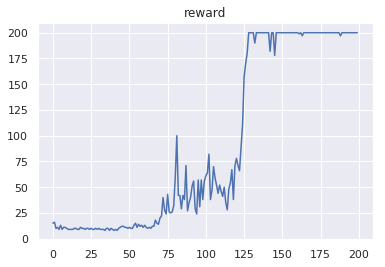

In [43]:
# Trainer
trainer = Trainer(env, policy, dataset)

# Train Q-Network
policy.train()
trainer.train()

trainer.plot('reward')

In [0]:
# Save checkpoint
os.makedirs('ckpt', exist_ok=True)
ckpt_path = os.path.join('ckpt', 'ckpt.pt')

# Get parameters from models and optimizers
state_dict = {}
state_dict['trainer'] = trainer.state_dict()
state_dict['policy'] = policy.state_dict()

torch.save(state_dict, ckpt_path)

In [0]:
# Load checkpoint
ckpt = torch.load(ckpt_path)

# Update parameters with checkpoint
trainer.load_state_dict(ckpt['trainer'])
policy.load_state_dict(ckpt['policy'])

In [46]:
# Run evaluation
policy.eval()
trainer.evaluate()

reward: 200.0
reward: 200.0
reward: 200.0
reward: 200.0
reward: 200.0
reward: 200.0
reward: 200.0
reward: 200.0
reward: 193.0
reward: 200.0
